In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
from data_analysis.helpers import *

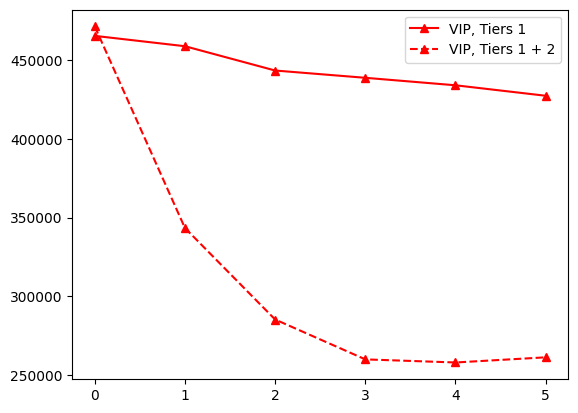

In [25]:
topology = "abilene"

experiment_name_a = "st_size"
config_path_a = "../sim_configs/" + experiment_name_a + "_config.json"
test_config_a = getTestConfig(config_path_a)
db_path_a = "../sim_outputs/" + experiment_name_a + "_" + topology + "_db.json"
db_a = getJsonDb(db_path_a)

experiment_name_b = "mt_size"
config_path_b = "../sim_configs/" + experiment_name_b + "_config.json"
test_config_b = getTestConfig(config_path_b)
db_path_b = "../sim_outputs/" + experiment_name_b + "_" + topology + "_db.json"
db_b = getJsonDb(db_path_b)

num_objects = [1000]
source_read_rate = [1000]
stop_time = [100]
request_rate = 15
request_dist_param = 0.5
request_dist_type = "zipf"
pen_weight = 0
vip_inc = 0
vip_slot_len = 1
vip_win_size = 100
cache_capacities = [[5],[6],[7],[8],[9],[10]]
cache_read_rates = [[25]]
cache_write_rates = [[25]]
cache_read_pens = [[0]]
cache_write_pens = [[0]]

case_filters = [
    ("request_dist_param", request_dist_param, None),
    ("request_rate", request_rate, None),
]

param_list_a = simConfigToParamSets(test_config_a)
param_list_a = filterParamList(param_list_a, case_filters)
param_list_b = simConfigToParamSets(test_config_b)
param_list_b = filterParamList(param_list_b, case_filters)
metric="delay"

x_data = [0, 1, 2, 3, 4, 5]

fig, ax = plt.subplots()
fwd_pol = "vip"
cache_pol = "lfu"
is_vip = True

if is_vip:
    filters = [
        ("fwd_pol", fwd_pol, None),
    ]
else:
    filters = [
        ("cache_pol", cache_pol, None),
    ]
    match cache_pol:
        case "lru":
            style="-gx"
        case "lfu":
            style="-ks"
        case "fifo":
            style="-md"
        case "unif":
            style="-yo"

new_param_list_a = filterParamList(param_list_a, filters)
res = getDataFieldSumAvgsAcrossSeeds(
    topology,
    db_a,
    new_param_list_a,
    test_config_a["source_map_seed"],
    test_config_a["request_generator_seed"],
    metric,
)
if is_vip:
    ax.plot(x_data, res, "-r^", label=fwd_pol.upper() + ", Tiers 1")
else:
    ax.plot(x_data, res, style, label=cache_pol.upper() + ", Tiers 1")
new_param_list_b = filterParamList(param_list_b, filters)
res = getDataFieldSumAvgsAcrossSeeds(
    topology,
    db_b,
    new_param_list_b,
    test_config_b["source_map_seed"],
    test_config_b["request_generator_seed"],
    metric,
)
if is_vip:
    ax.plot(x_data, res, "--r^", label=fwd_pol.upper() + ", Tiers 1 + 2")
else:
    ax.plot(x_data, res, "--"+style, label=cache_pol.upper() + ", Tiers 1 + 2")

ax.legend()

plt.show()